# Vizualization and working with Jupyter!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

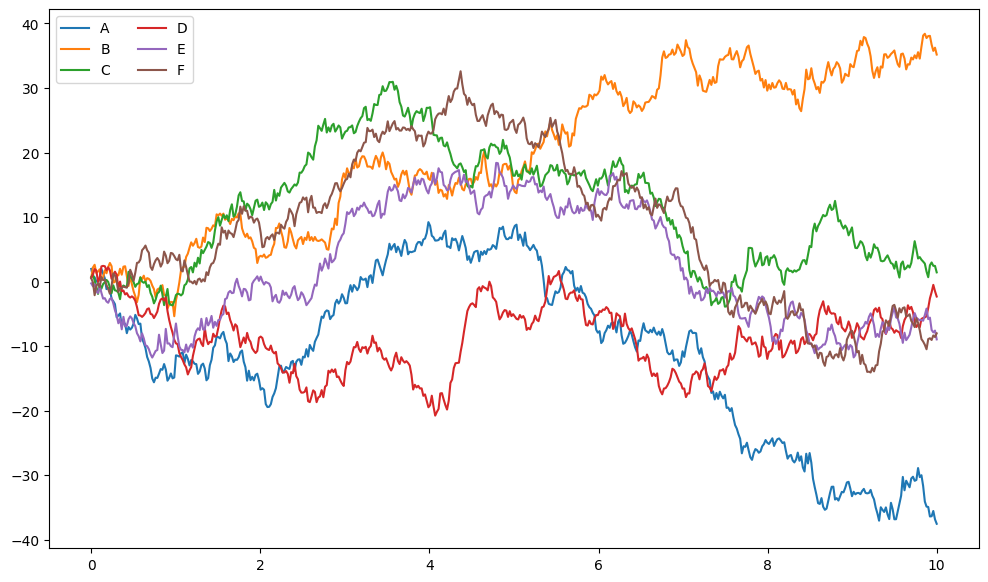

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Interacting with data

In [4]:
import requests 
import pandas as pd

In [13]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={'periods': '3600', 'after':str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df
    

In [14]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))

In [15]:
btc = get_historic_price('btc', 'bitsamp', after=last_week)

HTTPError: 410 Client Error: Gone for url: https://api.cryptowat.ch/markets/bitsamp/btcusd/ohlc?periods=3600&after=1702752044

In [16]:
eth = get_historic_price('btc', 'bitstamp', after=last_week)

HTTPError: 410 Client Error: Gone for url: https://api.cryptowat.ch/markets/bitstamp/btcusd/ohlc?periods=3600&after=1702752044